<a href="https://colab.research.google.com/github/JinLeeGG/Python_CodingTest/blob/main/(Round2-Day11)%20DFS%2C%20BFS%20Problem%20Solving/DFS%2C_BFS_problem_solving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1
https://www.acmicpc.net/problem/2644

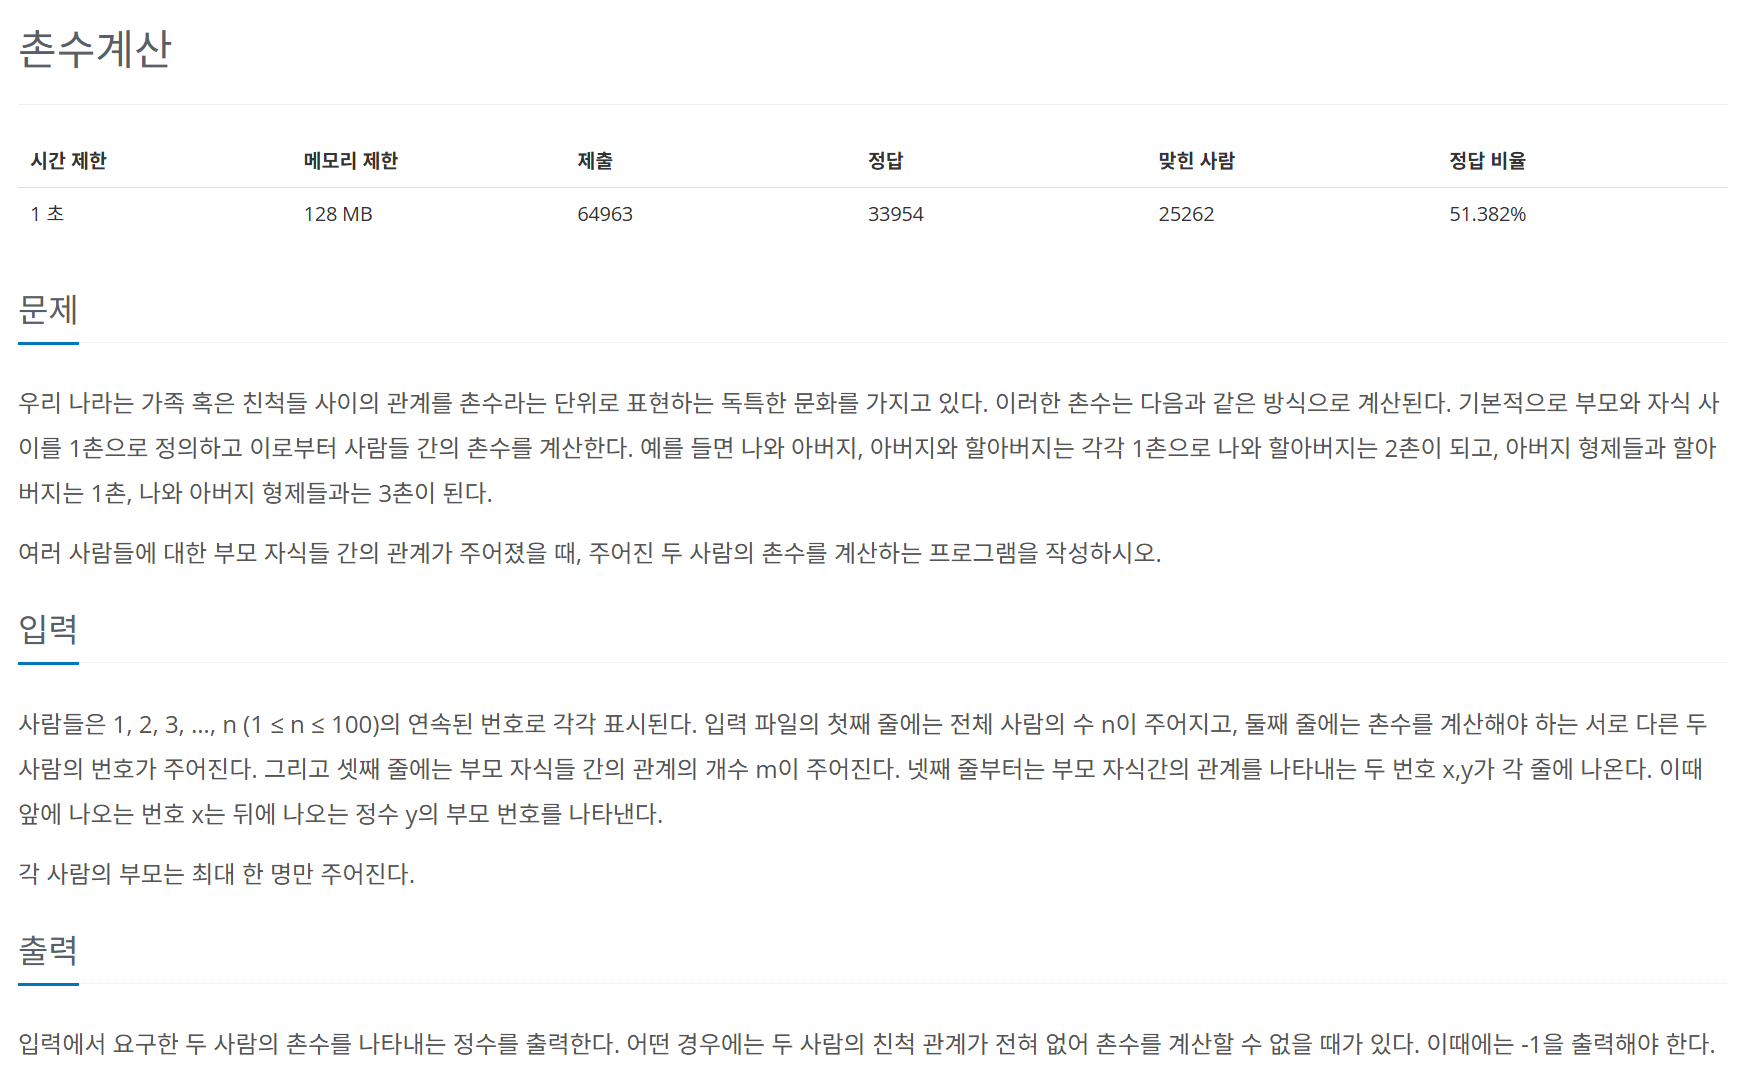

In [ ]:
# my answer

# 전체 사람의 수 N
N = int(input())
# 비교대상 A, B
A, B = map(int, input().split())
# 부모 자식들 간의 관계의 개수
M = int(input())

# 이 형식으로 트리 저장 {1 : [2, 3], 2 : [7, 8, 9]}
tree = {}

for i in range(M):
  C, D = map(int, input().split())
  if C not in tree:
    tree[C] = [D]
  else:
    tree[C].append(D)

# 1 [2, 3]   value에서 다음 key값인 2가 있는지 확인
# 2 [7, 8, 9]   value에서 다음 key값인 4가 있는지 확인. 없으면 다음 key:value값을 tree에서 없애고 다른 트리로 분리
# 4 [5, 6]

# 연결되어있지 않은 트리 다른데로 저장
seperatedTree = {}

keys = list(tree.keys())

for i in range(len(keys) - 1):
    current_key = keys[i]
    next_key = keys[i+1]

    if next_key not in tree[current_key]:
        seperatedTree[next_key] = tree[next_key]
        tree.pop(next_key)
        break

# 4 [5, 6] 이 나와야함
print(seperatedTree)
print(tree)

# 비교대상 트리 안에서 찾기
Alevel = 0
Blevel = 0
result = 0
for key, value in tree.items():
   for v in value:
        if v == A:
            Alevel += key
        elif v == B:
            Blevel += key
        else:
            result = -1

# # 다른 트리에 해당될 경우 -1

# # 같은 트리에 해당될경우 레벨 찾고 반환
print("결과")
print("A", Alevel)
print("B", Blevel)
print(abs(Blevel + Alevel))



# Problem 2
https://www.acmicpc.net/problem/14503

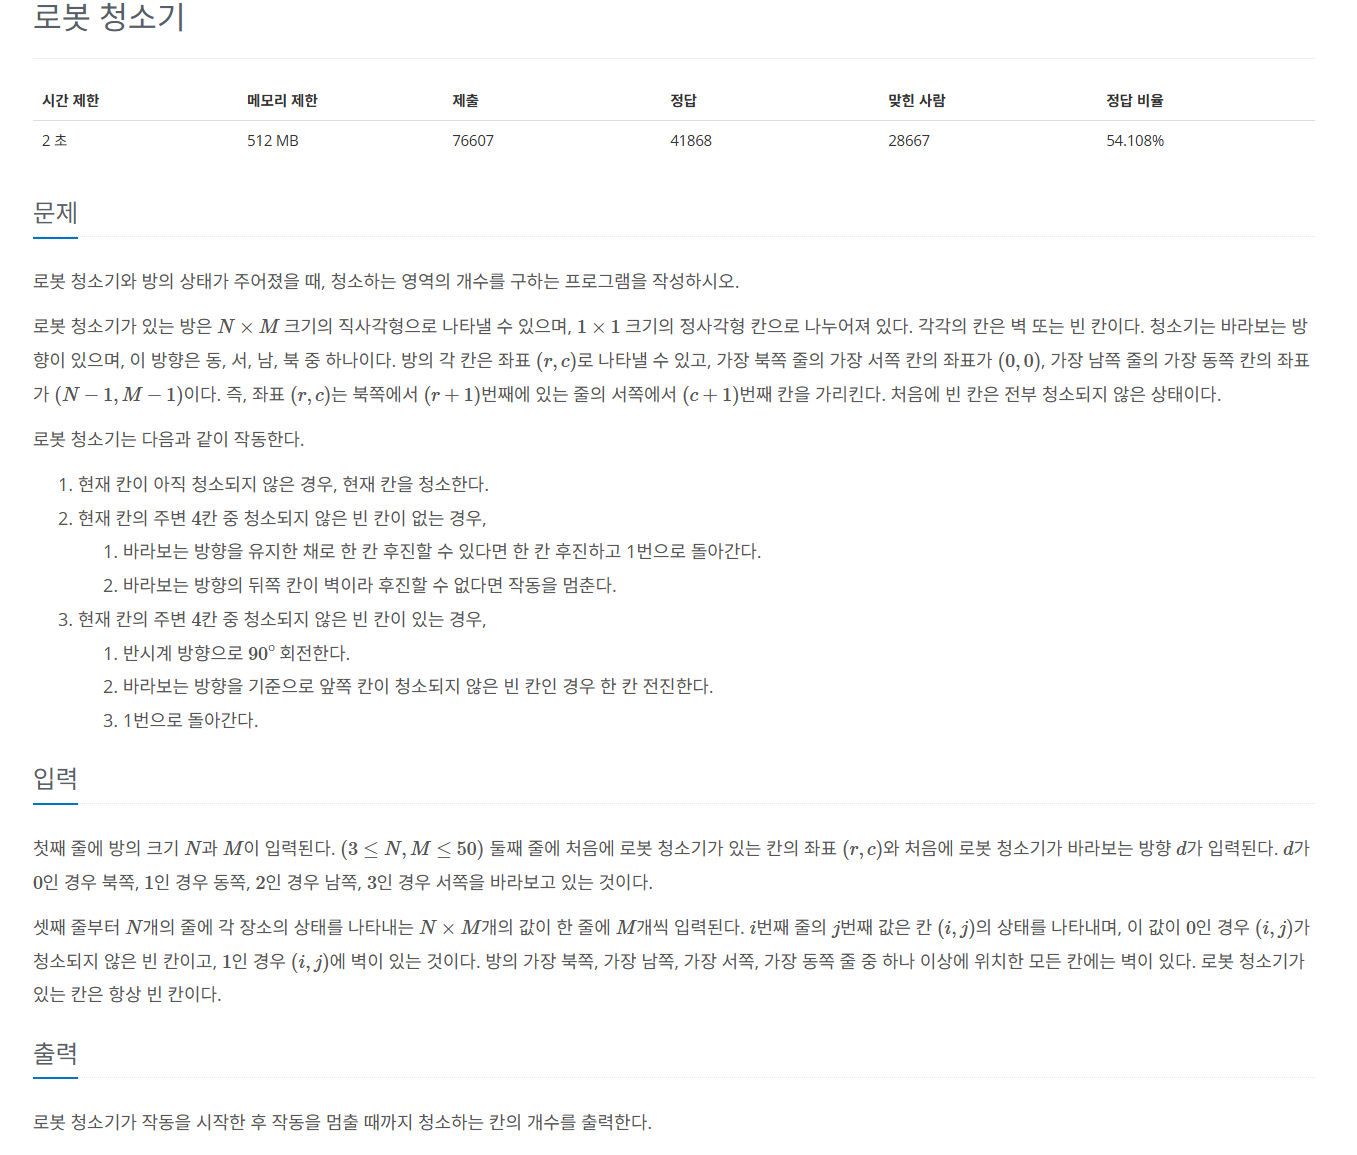

In [ ]:
# 나중에 풀어보기

# Problem 3
https://school.programmers.co.kr/learn/courses/30/lessons/64063

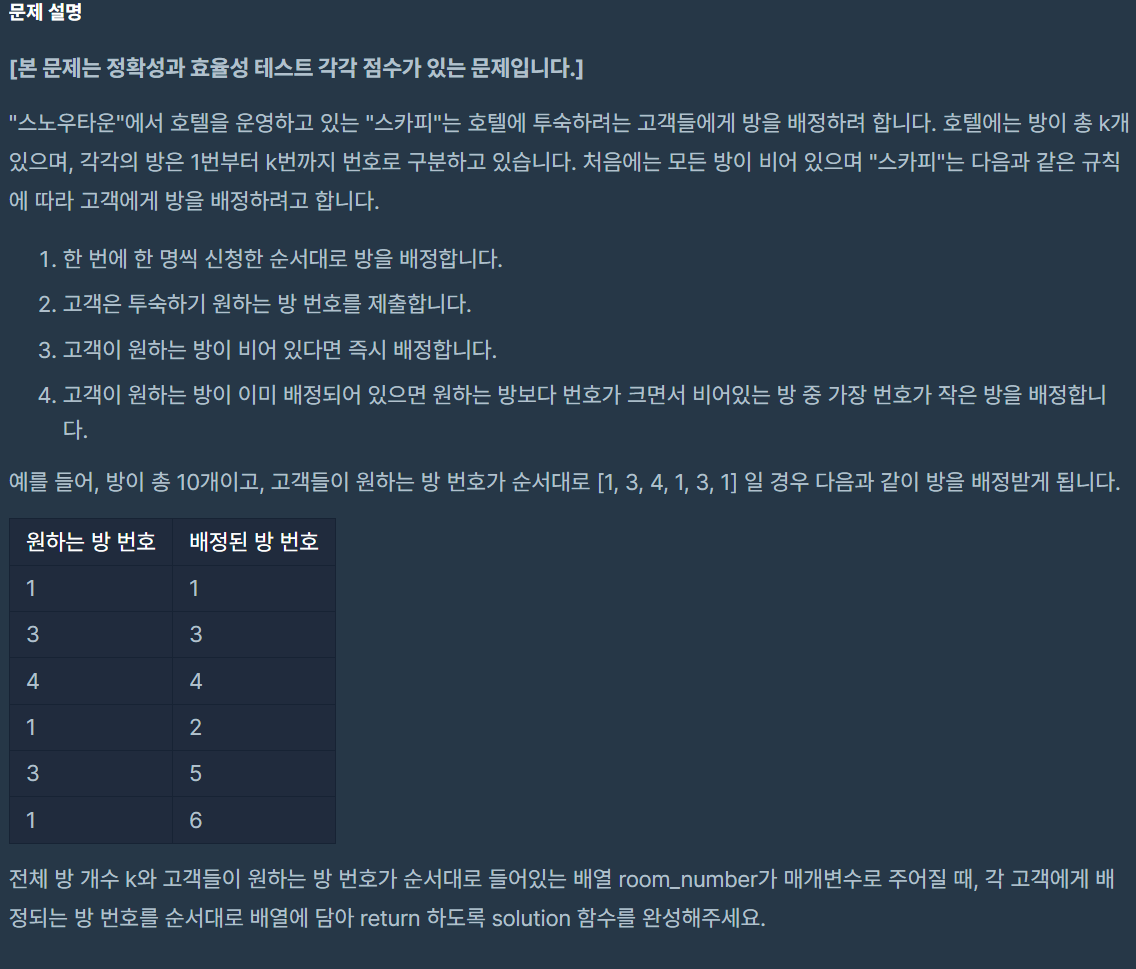

In [15]:
# My answer
def solution(k, room_number):
    answer = []
    # 손님에게 할당안된방 False로 지정
    hotelroom = [False for i in range(k+1)]

    # 손님이 원하는 각 방 번호마다 루핑
    for num in room_number:
        assign_num = num
        # 빈 방이 나올때까지 검색
        while hotelroom[assign_num] == True:
            assign_num += 1

        # 방을 찾은 후 할당
        hotelroom[assign_num] = True
        # 할당된 방 인덱스 추가
        answer.append(assign_num)

    return answer

In [16]:
solution(10,[1,3,4,1,3,1])

[1, 3, 4, 2, 5, 6]

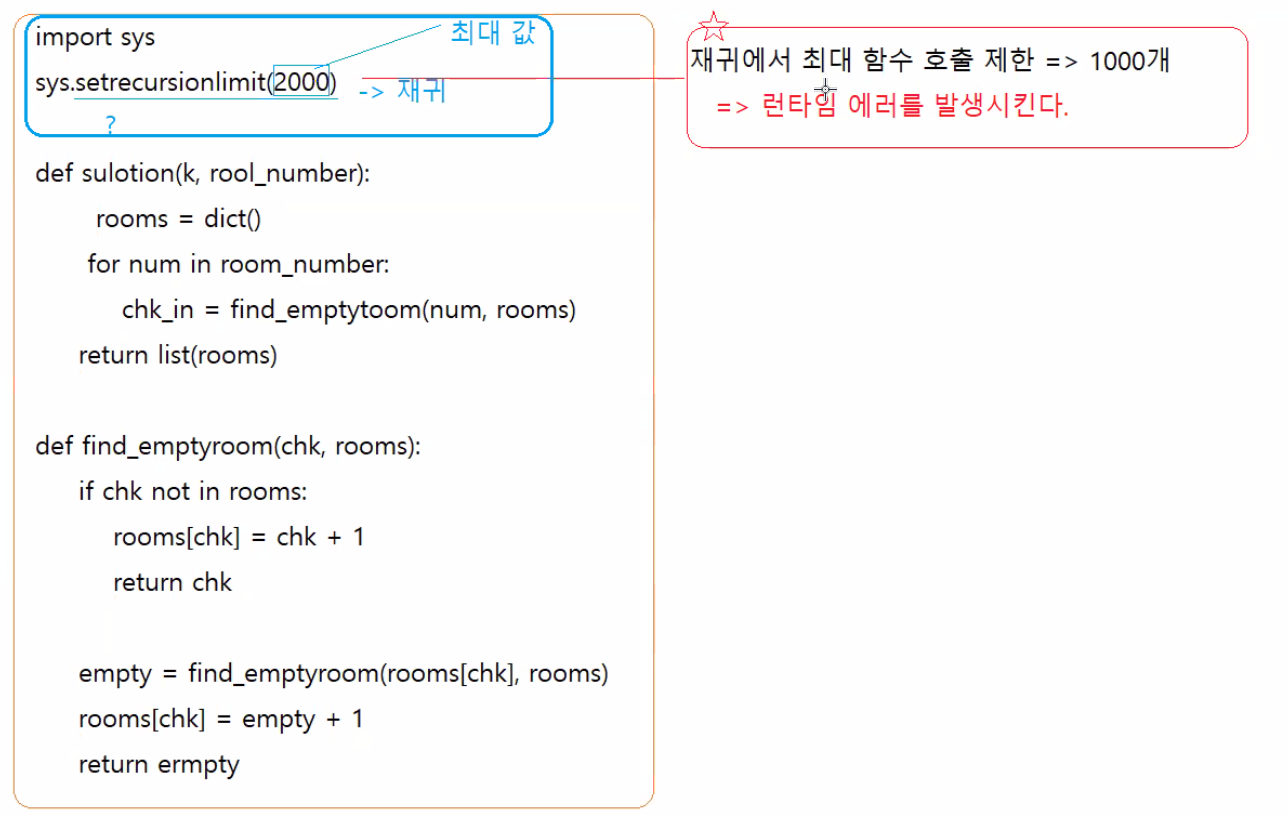

In [19]:
import sys
sys.setrecursionlimit(2000) # 재귀 제한을 2000으로 설정

def solution(k, room_number):
    rooms = dict()
    for num in room_number:
        chk_in = find_emptyroom(num, rooms)
    return list(rooms)

def find_emptyroom(chk, rooms):
    if chk not in rooms:
        rooms[chk] = chk + 1
        return chk

    empty = find_emptyroom(rooms[chk], rooms)
    rooms[chk] = empty + 1
    return empty

solution(10,[1,3,4,1,3,1])


[1, 3, 4, 2, 5, 6]

In [20]:
import sys
sys.setrecursionlimit(2000)  # 재귀 제한을 2000으로 설정 (깊은 재귀 호출 방지)

def solution(k, room_number):
    """
    호텔 방 배정 문제 해결 함수

    Args:
        k: 전체 방의 개수 (실제로는 사용되지 않음)
        room_number: 고객들이 원하는 방 번호 리스트

    Returns:
        실제로 배정된 방 번호들의 리스트
    """
    rooms = dict()  # 방 배정 상태를 저장하는 딕셔너리 {배정된_방: 다음_빈방_후보}

    # 각 고객의 희망 방 번호에 대해 처리
    for num in room_number:
        chk_in = find_emptyroom(num, rooms)  # 실제 배정받은 방 번호

    return list(rooms)  # 배정된 모든 방 번호를 리스트로 반환

def find_emptyroom(chk, rooms):
    """
    빈 방을 찾아서 배정하는 재귀 함수

    Args:
        chk: 확인하고자 하는 방 번호
        rooms: 현재 방 배정 상태 딕셔너리

    Returns:
        실제로 배정된 방 번호

    동작 원리:
    - Union-Find 자료구조의 경로 압축 기법 사용
    - 각 방은 다음 빈 방 후보를 가리킴
    - 재귀적으로 빈 방을 찾고, 경로를 압축하여 성능 최적화
    """
    # 해당 방이 아직 배정되지 않은 경우
    if chk not in rooms:
        rooms[chk] = chk + 1  # 현재 방을 배정하고, 다음 빈방 후보를 chk+1로 설정
        return chk            # 배정된 방 번호 반환

    # 해당 방이 이미 배정된 경우, 다음 빈방 후보를 재귀적으로 탐색
    empty = find_emptyroom(rooms[chk], rooms)

    # 경로 압축: 현재 방의 다음 빈방 후보를 실제 찾은 빈방의 다음으로 업데이트
    # 이렇게 하면 다음번에 같은 경로로 탐색할 때 더 빠르게 빈방을 찾을 수 있음
    rooms[chk] = empty + 1

    return empty  # 실제 배정된 방 번호 반환

# 테스트 실행
# k=10 (방 개수), room_number=[1,3,4,1,3,1] (고객들이 원하는 방 번호)
result = solution(10, [1,3,4,1,3,1])
print(f"배정된 방 번호들: {result}")

# 실행 과정 예시:
# 1번 고객: 1번 방 요청 → 1번 방 배정
# 2번 고객: 3번 방 요청 → 3번 방 배정
# 3번 고객: 4번 방 요청 → 4번 방 배정
# 4번 고객: 1번 방 요청 → 1번 방 이미 배정됨 → 2번 방 배정
# 5번 고객: 3번 방 요청 → 3번 방 이미 배정됨 → 5번 방 배정
# 6번 고객: 1번 방 요청 → 1번 방 이미 배정됨 → 6번 방 배정

배정된 방 번호들: [1, 3, 4, 2, 5, 6]
